Computing LLE embedding


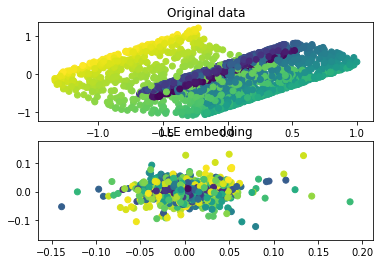

In [2]:
# -*- coding: utf-8 -*-
"""
===================================
Swiss Roll reduction with LLE
===================================
An illustration of Swiss Roll reduction
with locally linear embedding
"""

################################################################################
# locally linear embedding function

from scipy.sparse import linalg, eye
from pyamg import smoothed_aggregation_solver
from sklearn import neighbors
import numpy as np

def locally_linear_embedding(X, n_neighbors, out_dim, tol=1e-6, max_iter=200):
    W = neighbors.kneighbors_graph(
        X, n_neighbors=n_neighbors, mode='connectivity')
    #"connectivity" or "distance"

    # M = (I-W)' (I-W)
    A = eye(*W.shape, format=W.format) - W
    A = (A.T).dot(A).tocsr()

    # initial approximation to the eigenvectors
    X = np.random.rand(W.shape[0], out_dim)
    ml = smoothed_aggregation_solver(A, symmetry='symmetric')
    prec = ml.aspreconditioner()

    # compute eigenvalues and eigenvectors with LOBPCG
    eigen_values, eigen_vectors = linalg.lobpcg(
        A, X, M=prec, largest=False, tol=tol, maxiter=max_iter)

    index = np.argsort(eigen_values)
    return eigen_vectors[:, index], np.sum(eigen_values)


import numpy as np
import pylab as pl

################################################################################
# generate the swiss roll

n_samples, n_features = 2000, 3
n_turns, radius = 1.2, 1.0
rng = np.random.RandomState(0)
t = rng.uniform(low=0, high=1, size=n_samples)
data = np.zeros((n_samples, n_features))

# generate the 2D spiral data driven by a 1d parameter t
max_rot = n_turns * 2 * np.pi
data[:, 0] = radius = t * np.cos(t * max_rot)
data[:, 1] = radius = t * np.sin(t * max_rot)
data[:, 2] = rng.uniform(-1, 1.0, n_samples)
manifold = np.vstack((t * 2 - 1, data[:, 2])).T.copy()
colors = manifold[:, 0]

# rotate and plot original data
sp = pl.subplot(211)
U = np.dot(data, [[-.79, -.59, -.13],
                  [ .29, -.57,  .75],
                  [-.53,  .56,  .63]])
sp.scatter(U[:, 1], U[:, 2], c=colors)
sp.set_title("Original data")


print ("Computing LLE embedding")
n_neighbors, out_dim = 12, 2
X_r, cost = locally_linear_embedding(data, n_neighbors, out_dim)

sp = pl.subplot(212)
sp.scatter(X_r[:,0], X_r[:,1], c=colors)
sp.set_title("LLE embedding")
pl.show()

In [3]:
def robust_neighbor_embedding(X, n_neighbors, out_dim, tol=1e-6, max_iter=200):
    
    #recevied from LLE
    W = neighbors.kneighbors_graph(
        X, n_neighbors=n_neighbors, mode='connectivity')
    #"connectivity" or "distance"
    #n,d = X.shape
    X = np.random.rand(W.shape[0], out_dim)
    n,d = X.shape
    ## W
    
    # M = (I-W)' (I-W)
    #A = eye(*W.shape, format=W.format) - W
    #A = (A.T).dot(A).tocsr()
    A = ((eye(n) - np.transpose(W)) * X)#.tocsr()
    AA = (A.T)*A #.tocsr()
    AAplus = 0.5 * (np.abs(AA) + AA).tocsr()
    AAsubtract = 0.5 * (np.abs(AA) - AA).tocsr()
    
    #initialize H, Y, alpha, gamma, gamma_max, mu
    M = A * H
    Y = np.zeros((n,m))
    mu = 1.1
    gamma = 10
    max_gamma = 10000000000.0
    alpha = 1000.0
    iter_num = 50
    iter_numH = 30

    # initial approximation to the eigenvectors
    H = np.random.rand(d.shape[0], out_dim)
    
    for iterTotal in np.arange(1,iter_num+1).reshape(-1):
        AM = np.transpose(A) * M
        AY = np.transpose(A) * Y
        AMplus = 0.5 * (np.abs(AM) + AM)
        AMsubtract = 0.5 * (np.abs(AM) - AM)
        AYplus = 0.5 * (np.abs(AY) + AY)
        AYsubtract = 0.5 * (np.abs(AY) - AY)
        
        ## Update H
        for i in np.arange(1,iter_numH+1).reshape(-1):
            G1 = diag(np.sqrt(1.0 / (diag(np.transpose(H) * H) + eps)))
            H = H * G1
            H = np.multiply(H,np.sqrt((alpha * H + gamma * AMplus + gamma * AAsubtract * H + AYplus) / (alpha * H * (np.transpose(H) * H) + gamma * AMsubtract + gamma * AAplus * H + AYsubtract + eps)))
        
        ## Update M
        temp = A * H - Y / gamma
        M = wthresh(temp,'s',1 / gamma)
        #     M = sign(temp).*max(abs(temp) - 1/gamma,0);
        ## Update Y
        Y = Y + gamma * (M - A * H)
        ## Update gamma
        gamma = np.amin(mu * gamma,max_gamma)
        ## obj
        obj[iterTotal] = sum(sum(np.abs(A * H))) + 1 / 4 * alpha * norm((np.transpose(H) * H - np.eye(m)),'fro') ** 2
        #     disp(['obj:',num2str(iterTotal),': ',num2str(obj(iterTotal))]);
#     disp(' ');
    
    tempVector = np.sum(H ** 2, 2-1)
    __,value = __builtint__.sorted(tempVector,'descend')
    
    I = value(np.arange(1,m+1))
    
    ml = smoothed_aggregation_solver(I, symmetry='symmetric')
    prec = ml.aspreconditioner()

    # compute eigenvalues and eigenvectors with LOBPCG
    eigen_values, eigen_vectors = linalg.lobpcg(
        I, H, M=prec, largest=False, tol=tol, maxiter=max_iter)

    index = np.argsort(eigen_values)
    return eigen_vectors[:, index], np.sum(eigen_values)



Computing LLE embedding


ValueError: operands could not be broadcast together with shapes (2,2000) (2000,2) 

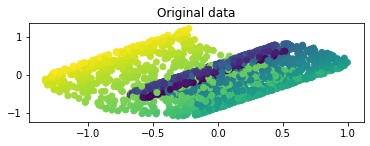

In [4]:
import numpy as np
import pylab as pl

################################################################################
# generate the swiss roll

n_samples, n_features = 2000, 3
n_turns, radius = 1.2, 1.0
rng = np.random.RandomState(0)
t = rng.uniform(low=0, high=1, size=n_samples)
data = np.zeros((n_samples, n_features))

# generate the 2D spiral data driven by a 1d parameter t
max_rot = n_turns * 2 * np.pi
data[:, 0] = radius = t * np.cos(t * max_rot)
data[:, 1] = radius = t * np.sin(t * max_rot)
data[:, 2] = rng.uniform(-1, 1.0, n_samples)
manifold = np.vstack((t * 2 - 1, data[:, 2])).T.copy()
colors = manifold[:, 0]

# rotate and plot original data
sp = pl.subplot(211)
U = np.dot(data, [[-.79, -.59, -.13],
                  [ .29, -.57,  .75],
                  [-.53,  .56,  .63]])
sp.scatter(U[:, 1], U[:, 2], c=colors)
sp.set_title("Original data")


print ("Computing LLE embedding")
n_neighbors, out_dim = 12, 2
X_r, cost = robust_neighbor_embedding(data, n_neighbors, out_dim)

sp = pl.subplot(212)
sp.scatter(X_r[:,0], X_r[:,1], c=colors)
sp.set_title("LLE embedding")
pl.show()

In [114]:
import pywt

################################################################################
# generate the swiss roll

n_samples, n_features = 2000, 3
n_turns, radius = 1.2, 1.0
rng = np.random.RandomState(0)
t = rng.uniform(low=0, high=1, size=n_samples)
data = np.zeros((n_samples, n_features))
X=data
# # generate the 2D spiral data driven by a 1d parameter t
# max_rot = n_turns * 2 * np.pi
# data[:, 0] = radius = t * np.cos(t * max_rot)
# data[:, 1] = radius = t * np.sin(t * max_rot)
# data[:, 2] = rng.uniform(-1, 1.0, n_samples)
# manifold = np.vstack((t * 2 - 1, data[:, 2])).T.copy()
# colors = manifold[:, 0]

# # rotate and plot original data
# sp = pl.subplot(211)
# U = np.dot(data, [[-.79, -.59, -.13],
#                   [ .29, -.57,  .75],
#                   [-.53,  .56,  .63]])
# sp.scatter(U[:, 1], U[:, 2], c=colors)
# sp.set_title("Original data")


# print ("Computing LLE embedding")
# n_neighbors, out_dim = 12, 2
# X_r, cost = robust_neighbor_embedding(data, n_neighbors, out_dim)

# sp = pl.subplot(212)
# sp.scatter(X_r[:,0], X_r[:,1], c=colors)
# sp.set_title("LLE embedding")
# pl.show()

tol=1e-6
max_iter=200
B = [[0], [3], [1]]
W = neighbors.kneighbors_graph(
        B, X, mode='connectivity')
    #"connectivity" or "distance"
#n,d = X.shape
X = np.random.rand(W.shape[0], out_dim)
n,d = X.shape
H = np.random.rand(d, n)

A = ((eye(n) - np.transpose(W)) * X)#.tocsr()
AA = np.dot(A.T,A) #.tocsr()
AAplus = 0.5 * (np.abs(AA) + AA)
AAsubtract = 0.5 * (np.abs(AA) - AA)
    
    #initialize H, Y, alpha, gamma, gamma_max, mu
O = np.dot(A, H)
Y = np.zeros((n,3))
mu = 1.1
gamma = 10
max_gamma = 10000000000.0
alpha = 1000.0
##iter_num = 50
#iter_numH = 30


AM = np.dot(np.transpose(A), O)
AY =np.dot(np.transpose(A) , Y)
AMplus = 0.5 * (np.abs(AM) + AM)
AMsubtract = 0.5 * (np.abs(AM) - AM)
AYplus = 0.5 * (np.abs(AY) + AY)
AYsubtract = 0.5 * (np.abs(AY) - AY)
        ## Update H
#for i in np.arange(1,max_iter+1).reshape(-1):
            #G1 = np.diag(np.sqrt(1.0 / np.dot(np.diag(np.transpose(H)), H) + eps))
G1 = np.diag(np.sqrt(1.0 / np.diag(np.dot(np.transpose(H), H)) + 1))
H = np.dot(H, G1)
H = np.multiply(H,np.sqrt((alpha * H) + (gamma * AMplus)+np.dot(gamma*AAsubtract, H) + AYplus/ np.dot((alpha * H ), np.dot(np.transpose(H), H))+gamma * AMsubtract + gamma * np.dot(AAplus,H)+ AYsubtract + 1))
H

from scipy.sparse import coo_matrix
n_H = coo_matrix(H, shape=(2, 3)).tocsr()
n_H
#SPMat=(H.T).dot(H).tocsr()

ml = smoothed_aggregation_solver(G1, symmetry='symmetric')
prec = ml.aspreconditioner()


# #     # compute eigenvalues and eigenvectors with LOBPCG
# eigen_values, eigen_vectors = linalg.lobpcg(
# n_H, G1, M=prec, largest=False, tol=tol, maxiter=max_iter)
eigen_values, eigen_vectors = np.linalg.eigh(np.dot(np.transpose(H), H))

index = np.argsort(eigen_values)
print(eigen_vectors[:, index], np.sum(eigen_values))
#     temp = np.dot(A, H) - Y / gamma
#     M = pywt.threshold(temp,1 / gamma,'soft')
#         #     M = sign(temp).*max(abs(temp) - 1/gamma,0);
# ## Update Y
#     Y = Y + gamma * (M - np.dot(A , H))
#         ## Update gamma
#     gamma = np.minimum(mu * gamma,max_gamma)
#         ## obj
    #obj[iterTotal] = sum(sum(np.abs(np.dot(A, H))) + 1 / 4 * alpha * norm((np.dot(np.transpose(H), H) - np.eye(3)),'fro')**2
    #obj[iterTotal] = sum(sum(np.abs(np.dot(A, H))) + 1 / 4 * alpha * np.power(np.linalg.norm((np.dot(np.transpose(H), H) - np.eye(3))),2))        #     disp(['obj:',num2str(iterTotal),': ',num2str(obj(iterTotal))]);
#     disp(' ');
    
#tempVector = np.sum(np.power(H,2), 2)
#__,value = __builtint__.sorted(tempVector,'descend')
    
#I = value(np.arange(1,3+1))

# ml = smoothed_aggregation_solver(H, symmetry='symmetric')
# prec = ml.aspreconditioner()

#     # compute eigenvalues and eigenvectors with LOBPCG
# eigen_values, eigen_vectors = linalg.lobpcg(
# H, X, M=prec, largest=False, tol=tol, maxiter=max_iter)

# index = np.argsort(eigen_values)



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [82]:
n_H

<2x3 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [83]:
AA

array([[1.58006241, 1.35940818],
       [1.35940818, 1.35169845]])

In [84]:
M

array([[-1.0106267 , -0.47259373,  0.121758  ],
       [-1.22570445, -0.35065785, -0.52410127],
       [-0.67657027, -0.17574269, -0.34308056]])

In [85]:
G1

array([[2.0266234 , 0.        , 0.        ],
       [0.        , 1.31967571, 0.        ],
       [0.        , 0.        , 1.5341165 ]])

In [86]:
O

array([[-0.64508666, -1.51058495, -0.83300633],
       [ 0.16511288,  0.49641042,  0.18413558],
       [-0.56329516, -1.05349287, -0.79773171]])

In [68]:
from scipy.sparse import coo_matrix
n_H = coo_matrix(H, shape=(2, 3)).tocsr()
n_H

<2x3 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [72]:
#def locally_linear_embedding(X, n_neighbors, out_dim, tol=1e-6, max_iter=200):
tol=1e-6
max_iter=200
B = [[0], [3], [1]]
W = neighbors.kneighbors_graph(
        B, 2, mode='connectivity')
    #"connectivity" or "distance"

    # M = (I-W)' (I-W)
A = eye(*W.shape, format=W.format) - W
A = (A.T).dot(A).tocsr()

    # initial approximation to the eigenvectors
X = np.random.rand(W.shape[0], out_dim)
ml = smoothed_aggregation_solver(A, symmetry='symmetric')
prec = ml.aspreconditioner()

    # compute eigenvalues and eigenvectors with LOBPCG
eigen_values, eigen_vectors = linalg.lobpcg(
A, X, M=prec, largest=False, tol=tol, maxiter=max_iter)

index = np.argsort(eigen_values)
print(eigen_vectors[:, index], np.sum(eigen_values))

[[-0.57735027  0.        ]
 [-0.57735027 -0.70710678]
 [-0.57735027  0.70710678]] 4.999999999999999


In [73]:
X

array([[0.25953201, 0.58590353],
       [0.93433518, 0.68644988],
       [0.93630755, 0.00800479]])

In [74]:
ml

multilevel_solver
Number of Levels:     1
Operator Complexity:  1.000
Grid Complexity:      1.000
Coarse Solver:        'pinv2'
  level   unknowns     nonzeros
    0            3            9 [100.00%]

In [75]:
prec

<3x3 _CustomLinearOperator with dtype=float64>

In [45]:
eigen_values

array([1., 4.])

In [46]:
eigen_vectors

array([[-0.57735027,  0.        ],
       [-0.57735027, -0.70710678],
       [-0.57735027,  0.70710678]])

In [47]:
eigen_vectors[:, index]

array([[-0.57735027,  0.        ],
       [-0.57735027, -0.70710678],
       [-0.57735027,  0.70710678]])

In [48]:
np.sum(eigen_values)

4.999999999999999

In [23]:
A

<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [29]:
G1

array([[1.70760825, 0.        , 0.        ],
       [0.        , 1.41333115, 0.        ],
       [0.        , 0.        , 1.39049265]])

In [35]:
from numpy import array

In [ ]:
33 32 33

In [54]:
M

array([[-0.23044056, -0.53610741, -0.43374691],
       [-0.37129578, -0.19062734,  0.1426832 ],
       [-1.18422063, -1.3196118 , -0.43454228]])

In [104]:
import pywt

def robust_neighbor_embedding(X, n_neighbors, out_dim, tol=1e-6, max_iter=200):
    
    W = neighbors.kneighbors_graph(
        X, n_neighbors=n_neighbors, mode='connectivity')
#     W = neighbors.kneighbors_graph(
#         B, 2, mode='connectivity')
    #"connectivity" or "distance"
#n,d = X.shape
    X = np.random.rand(W.shape[0], out_dim)
    n,d = X.shape
    H = np.random.rand(d, n)

    A = ((eye(n) - np.transpose(W)) * X)#.tocsr()
    AA = np.dot(A.T,A) #.tocsr()
    AAplus = 0.5 * (np.abs(AA) + AA)
    AAsubtract = 0.5 * (np.abs(AA) - AA)
    
    #initialize H, Y, alpha, gamma, gamma_max, mu
    O = np.dot(A, H)
    Y = np.zeros((n,2000))
    mu = 1.1
    gamma = 10
    max_gamma = 10000000000.0
    alpha = 1000.0
##iter_num = 50
#iter_numH = 30


    AM = np.dot(np.transpose(A), O)
    AY =np.dot(np.transpose(A) , Y)
    AMplus = 0.5 * (np.abs(AM) + AM)
    AMsubtract = 0.5 * (np.abs(AM) - AM)
    AYplus = 0.5 * (np.abs(AY) + AY)
    AYsubtract = 0.5 * (np.abs(AY) - AY)
        ## Update H
#for i in np.arange(1,max_iter+1).reshape(-1):
            #G1 = np.diag(np.sqrt(1.0 / np.dot(np.diag(np.transpose(H)), H) + eps))
    G1 = np.diag(np.sqrt(1.0 / np.diag(np.dot(np.transpose(H), H)) + 1))
    H = np.dot(H, G1)
    H = np.multiply(H,np.sqrt((alpha * H) + (gamma * AMplus)+np.dot(gamma*AAsubtract, H) + AYplus/ np.dot((alpha * H ), np.dot(np.transpose(H), H))+gamma * AMsubtract + gamma * np.dot(AAplus,H)+ AYsubtract + 1))
    H

#     from scipy.sparse import coo_matrix
#     n_H = coo_matrix(H, shape=(2, 3)).tocsr()
#     n_H
#SPMat=(H.T).dot(H).tocsr()

#     ml = smoothed_aggregation_solver(G1, symmetry='symmetric')
#     prec = ml.aspreconditioner()


# #     # compute eigenvalues and eigenvectors with LOBPCG
# eigen_values, eigen_vectors = linalg.lobpcg(
# n_H, G1, M=prec, largest=False, tol=tol, maxiter=max_iter)
    eigen_values, eigen_vectors = np.linalg.eigh(np.dot(np.transpose(H), H))

    index = np.argsort(eigen_values)
    return eigen_vectors[:, index], np.sum(eigen_values)



Computing LLE embedding


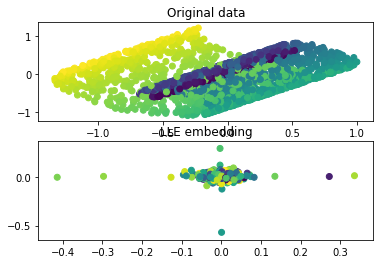

In [105]:
import numpy as np
import pylab as pl

################################################################################
# generate the swiss roll

n_samples, n_features = 2000, 3
n_turns, radius = 1.2, 1.0
rng = np.random.RandomState(0)
t = rng.uniform(low=0, high=1, size=n_samples)
data = np.zeros((n_samples, n_features))

# generate the 2D spiral data driven by a 1d parameter t
max_rot = n_turns * 2 * np.pi
data[:, 0] = radius = t * np.cos(t * max_rot)
data[:, 1] = radius = t * np.sin(t * max_rot)
data[:, 2] = rng.uniform(-1, 1.0, n_samples)
manifold = np.vstack((t * 2 - 1, data[:, 2])).T.copy()
colors = manifold[:, 0]

# rotate and plot original data
sp = pl.subplot(211)
U = np.dot(data, [[-.79, -.59, -.13],
                  [ .29, -.57,  .75],
                  [-.53,  .56,  .63]])
sp.scatter(U[:, 1], U[:, 2], c=colors)
sp.set_title("Original data")


print ("Computing LLE embedding")
n_neighbors, out_dim = 12, 2
X_r, cost = robust_neighbor_embedding(data, n_neighbors, out_dim)

sp = pl.subplot(212)
sp.scatter(X_r[:,0], X_r[:,1], c=colors)
sp.set_title("LLE embedding")
pl.show()

In [118]:
import pywt

################################################################################
# generate the swiss roll

n_samples, n_features = 2000, 3
n_turns, radius = 1.2, 1.0
rng = np.random.RandomState(0)
t = rng.uniform(low=0, high=1, size=n_samples)
data = np.zeros((n_samples, n_features))

tol=1e-6
max_iter=200
B = [[0], [3], [1]]
W = neighbors.kneighbors_graph(
        data, 12, mode='connectivity')
    #"connectivity" or "distance"
#n,d = X.shape
X = np.random.rand(W.shape[0], out_dim)
n,d = X.shape
H = np.random.rand(d, n)

A = ((eye(n) - np.transpose(W)) * X)#.tocsr()
AA = np.dot(A.T,A) #.tocsr()
AAplus = 0.5 * (np.abs(AA) + AA)
AAsubtract = 0.5 * (np.abs(AA) - AA)
    
    #initialize H, Y, alpha, gamma, gamma_max, mu
O = np.dot(A, H)
Y = np.zeros((n,2000))
mu = 1.1
gamma = 10
max_gamma = 10000000000.0
alpha = 1000.0
##iter_num = 50
#iter_numH = 30


AM = np.dot(np.transpose(A), O)
AY =np.dot(np.transpose(A) , Y)
AMplus = 0.5 * (np.abs(AM) + AM)
AMsubtract = 0.5 * (np.abs(AM) - AM)
AYplus = 0.5 * (np.abs(AY) + AY)
AYsubtract = 0.5 * (np.abs(AY) - AY)
        ## Update H
#for i in np.arange(1,max_iter+1).reshape(-1):
            #G1 = np.diag(np.sqrt(1.0 / np.dot(np.diag(np.transpose(H)), H) + eps))
G1 = np.diag(np.sqrt(1.0 / np.diag(np.dot(np.transpose(H), H)) + 1))
H = np.dot(H, G1)
H = np.multiply(H,np.sqrt((alpha * H) + (gamma * AMplus)+np.dot(gamma*AAsubtract, H) + AYplus/ np.dot((alpha * H ), np.dot(np.transpose(H), H))+gamma * AMsubtract + gamma * np.dot(AAplus,H)+ AYsubtract + 1))
H

# from scipy.sparse import coo_matrix
# n_H = coo_matrix(H, shape=(2, 3)).tocsr()
# n_H
#SPMat=(H.T).dot(H).tocsr()

ml = smoothed_aggregation_solver(G1, symmetry='symmetric')
prec = ml.aspreconditioner()


# #     # compute eigenvalues and eigenvectors 
eigen_values, eigen_vectors = np.linalg.eigh(np.dot(np.transpose(H), H))

index = np.argsort(eigen_values)
print(eigen_vectors[:, index], np.sum(eigen_values))





/Users/jarinyalimpanadusadee/anaconda3/lib/python3.6/site-packages/pyamg/aggregation/aggregation.py:217: SparseEfficiencyWarning: Implicit conversion of A to CSR
  warn("Implicit conversion of A to CSR", SparseEfficiencyWarning)


[[-0.00743122  0.         -0.01736484 ...  0.00371236  0.03186609
  -0.01925096]
 [ 0.14738886 -0.00829139  0.6967181  ... -0.38730157 -0.03107849
  -0.01091821]
 [-0.24954767  0.00918831  0.1738778  ...  0.07663071 -0.00273457
  -0.01900047]
 ...
 [ 0.0147769  -0.02873384 -0.02202946 ... -0.00540988  0.00485593
  -0.0259519 ]
 [-0.02760336 -0.02012313 -0.00495551 ...  0.00690385 -0.00270381
  -0.01738383]
 [ 0.00580053  0.06608045 -0.00089644 ...  0.03061642 -0.01115878
  -0.0219959 ]] 1124996997016.327


In [112]:
B = [[0], [3], [1]]

In [113]:
len(B)

3